# STEP 1  DATA collections ,Data Preprocessing, DATA cleaning

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# create contants
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS  = 3
EPOCHS = 20 # we are going to run 50 epochs  epoch refers to a complete iteration over the training data. 
# During each epoch, the model is trained on the entire dataset,

In [3]:
# here we 
Corn_dataset =tf.keras.preprocessing.image_dataset_from_directory (
    "Plant",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 3852 files belonging to 4 classes.


In [4]:
# class_names is  our folder where our images are store
class_names = Corn_dataset.class_names
class_names

['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy']

In [5]:
# it show 121 is beacuse every element of dataset is the batch of  32 images 
# it mean i batch has 121 pitcure or images
len(Corn_dataset)

121

In [6]:
121*32

3872

In [7]:
#create the function for explore or to understand the concept 
# here we create the function where we run 1 batch 
for image_batch, label_batch in Corn_dataset.take(1):
    print(image_batch.shape)
    
#In image shape we can see that there are 32 images and there size is 256 256 , and 3 is channel as we
# know gary scale has 1 channel and color scale has 3 channel 


# In bactch numpy we can watch that there are 4 classes or four folder where our images data store
    print(label_batch.numpy())



(32, 256, 256, 3)
[3 1 2 1 1 0 3 1 1 1 2 2 0 2 3 1 0 2 1 2 2 2 1 1 1 0 3 1 3 1 0 3]


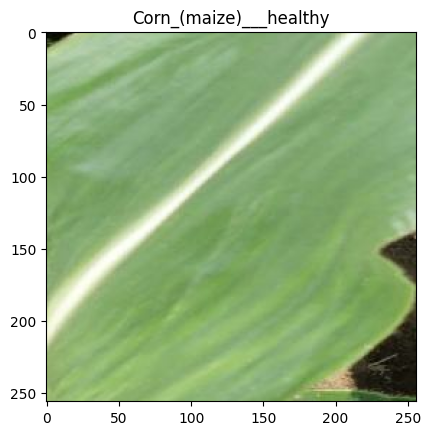

In [8]:
# for vauctation we use plt.imshow

plt.imshow(image_batch[0].numpy().astype("uint8")) # here we convert the float type
plt.title(class_names[label_batch[0]]) # for wactching the name of plant
plt.show() # for hiding the number we also hide through

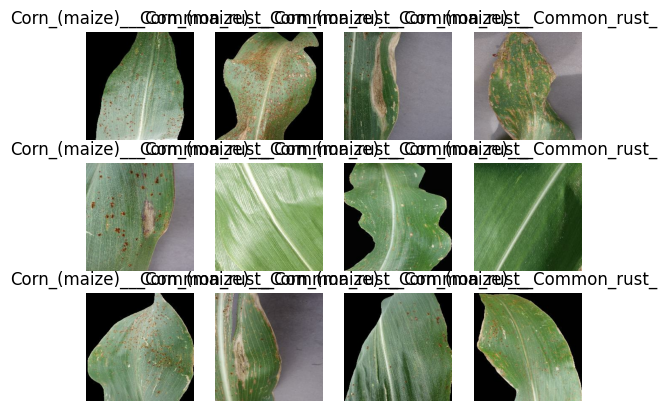

In [9]:
# Now i am going to create a function which show 12 images
# In this funcion the data is little bit massup so i create a subplot for Create and control multiple axes
for image_batch, label_batch in Corn_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8")) # here we convert the float type
        plt.title(class_names[label_batch[1]]) # for wactching the name of plant
       # for hiding the number we also hide through plt.axies('off')
        plt.axis("off")

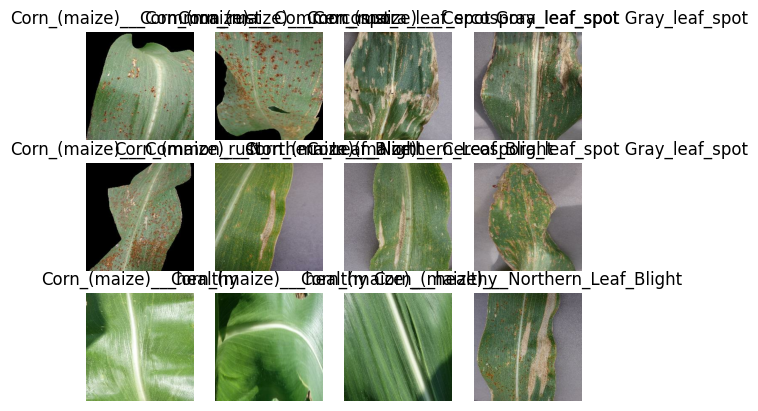

In [10]:
# subplot : Create and control multiple axes

for image_batch, label_batch in Corn_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)# here we create subplot and (3,4,i+1) is a matrix
        plt.imshow(image_batch[i].numpy().astype("uint8")) 
        plt.title(class_names[label_batch[i]]) 
        plt.axis('off') # for hiding the number


# now we are going to set the images size for batter

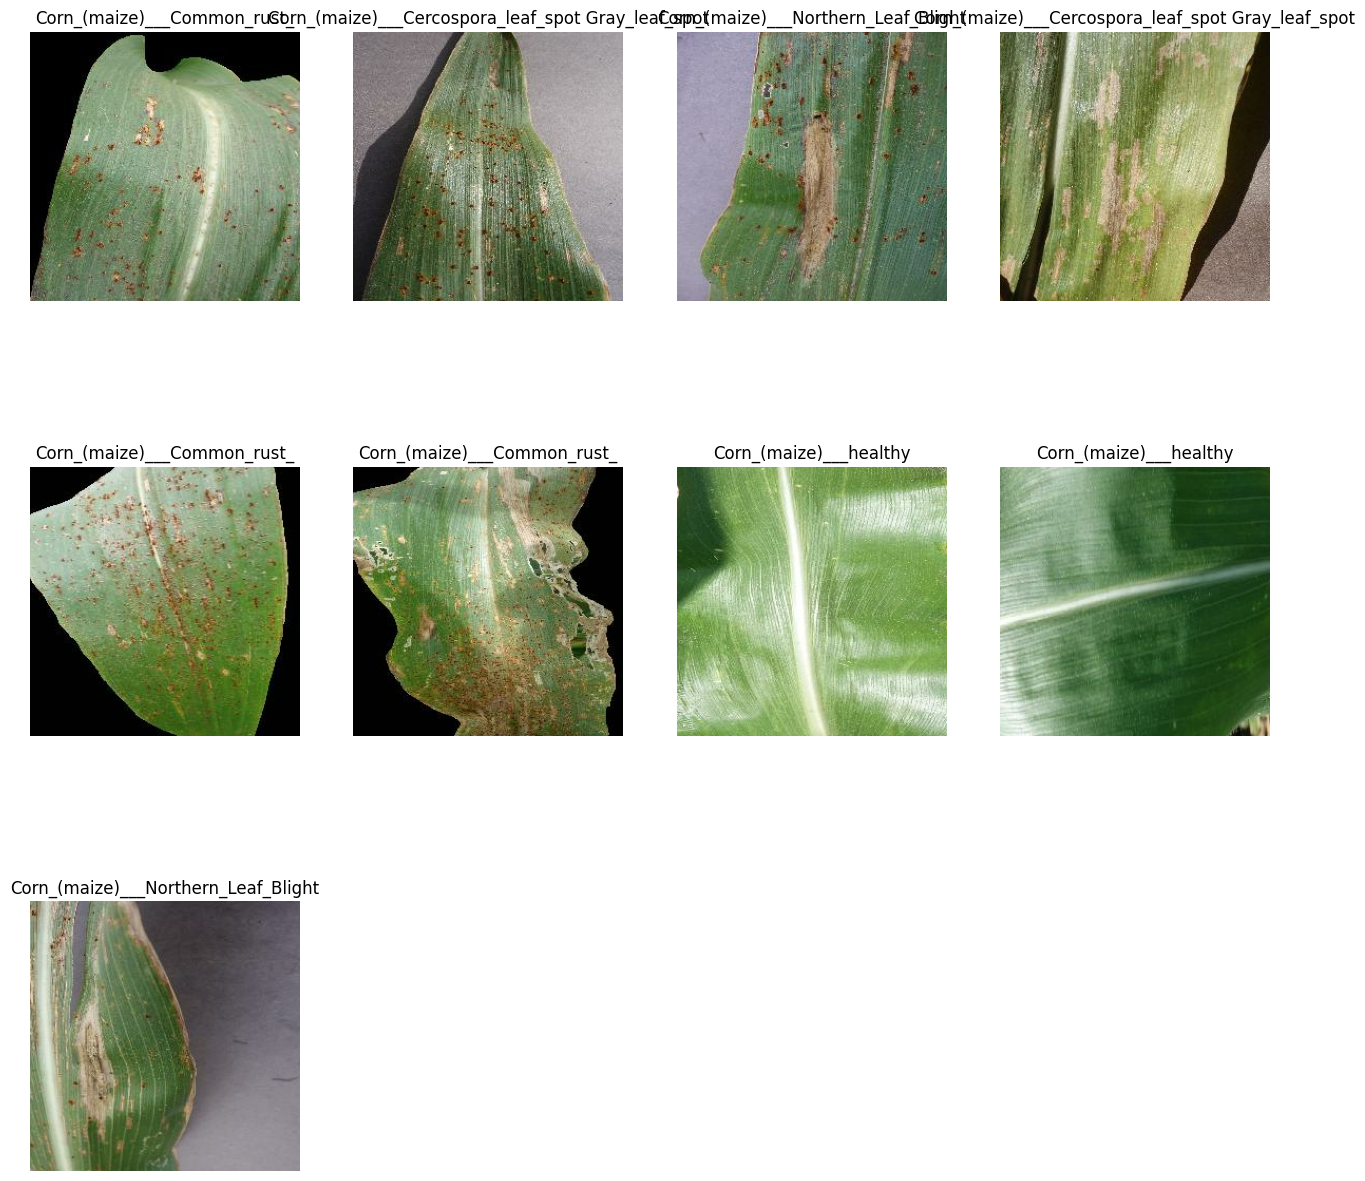

In [11]:
# now we are going to set the images size for batter valuction look this 
plt.figure(figsize = ( 16,16))
for image_batch, label_batch in Corn_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,4,i+1)# here we create subplot and (3,4,i+1) is a matrix
        plt.imshow(image_batch[i].numpy().astype("uint8")) 
        plt.title(class_names[label_batch[i]]) 
        plt.axis('off') # for hiding the number


# Note 1 now we are going to training and test and Validation and epocho


In [12]:
80% ==> training
20% ===> 10% validation , 10% test

SyntaxError: invalid syntax (2318206577.py, line 1)

# Note 2  in sklearn we have train_test_split method for train and test

In [13]:
# Here we are going to do dataset.take (10) it will take first 10 set or data form dataset
train_size = 0.8
len(Corn_dataset)*train_size


96.80000000000001

In [14]:
# what should i do now i take first 96 batch
train_Corn_dataset = Corn_dataset.take(96)
len(train_Corn_dataset)

96

In [15]:
# and now i am going to skip first 96 batch

test_Corn_dataset = Corn_dataset.skip(96)
len(test_Corn_dataset)

25

In [16]:
#now my Validation size 
Validation_size =0.1
# now the 10 % for my actical dataset is 12.100000000000001
len(Corn_dataset)*Validation_size


12.100000000000001

In [17]:
# now i am going to take validation dataset 
Validation_size = test_Corn_dataset.take(34)
len(Validation_size)


25

In [18]:
# now i am going to skip first 12 Validation
test_Corn_dataset = test_Corn_dataset.skip(12)
len(test_Corn_dataset)

13

# Note 3 
# we use shuffle beacuse helps break order-based patterns, reduces bias and overfitting, improves generalization capabilities, and enhances the efficiency of the training process.
# "get_dataset_partition_tf" IT tack the tenssfolw dataset and it also do track the split ratio


In [19]:
import tensorflow as tf

def get_dataset_partition_tf(Corn_dataset, train_split=0.8, validation_split=0.1, test_split=0.1, shuffle=True, shuffle_size=100000):
    dataset_size = sum(1 for _ in Corn_dataset) # Get the dataset size
    
# we use shuffle argument  before we train test we shuffle the 
# Shuffle the dataset if required
    if shuffle:
           Corn_dataset = Corn_dataset.shuffle(shuffle_size, seed=12)

       
# tack the tenssfolw dataset and it also do track the split ratio
    # Calculate split sizes
    train_size = int(train_split * dataset_size) # train size 
    validation_size = int(validation_split * dataset_size) # vali size also convert in the 

# Partition the dataset
    train_Corn_dataset = Corn_dataset.take(train_size)
    validation_dataset = Corn_dataset.skip(train_size).take(validation_size)
    test_Corn_dataset = Corn_dataset.skip(train_size + validation_size)# or skip(train_size).skip(validation_size)

    return train_Corn_dataset, validation_dataset, test_Corn_dataset



In [20]:
train_split ,Validation_split ,test_split = get_dataset_partition_tf(Corn_dataset )
train_Corn_dataset, validation_dataset, test_Corn_dataset = get_dataset_partition_tf(Corn_dataset)

In [21]:
len(train_split)

96

In [22]:
len(Validation_split)

12

In [23]:
len(test_split)

13

# Note 4
## now we are usinig cache( ) pipeline it will read the image from the disk and then for next irtraation when we need the same image
## it will keep in the memory it imporve the perform of our pipeline
## Prefetch mask the long latencies required to fetch data from memory. for READ CPU and TRAIN GPU we safe t

In [24]:
# Prepare the datasets
train_Corn_dataset = train_Corn_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_Corn_dataset = test_Corn_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
validation_dataset = validation_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

# Note 5

## now we are working on preporessing pipeline
### In images processing we do the first thing is scale so the RPB scale or numpy array we watch in the starting so we have to did the size of image 255 into 
### number so we can get the 0 and 1 the way we can do is using below code or tf.keras.Sequential after that we use preprocssing

In [25]:
# here we contect the size and recaling so if there is any image above 255 it at
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(2.0/255)
])

In [26]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_Vertical"),
    layers.RandomRotation(0.2),
])

# STEP 2 now we are going to build converition neruol network(CNN) AND Train that dataset and looking the accuracy 

# CNN algroithem

# Note 1
### In deep learning we alway first define the architecture which is below
### now our model architecture is build now we can watch the summery of our model after that we are going to train the model

In [27]:
# building the model and layers or we can say architecture
# creatin a varable of input shape for images
input_shape =(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS) # these variable we already create in the start we can see on cell 187
# Ensure correct label encoding and number of classes
num_classes = 10  # Adjust this based on the actual number of classes in your dataset

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
   # now we are going to use convolutional layer applies filters to detect patterns, and pooling layers reduce the spatial dimensions
    # relu = rectified linear activation function it is very fast to compute
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = input_shape),
    # now we are going to pooling layer 
    layers.MaxPooling2D((2,2)),

    # again run the same process for 
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    # flatten layer
    layers.Flatten(),
    layers.Dense(64 , activation = 'relu'),
    layers.Dense(num_classes , activation = 'softmax'), # softmax is used for normalize the probability of classes
    
    
])
model.build(input_shape =input_shape)

C:\Users\samiwadho\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary() # suummay for our architecture model

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 10)                    │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 184,202 (719.54 KB)

 Trainable params: 184,202 (719.54 KB)

 Non-trainable params: 0 (0.00 B)

# Note 2
### we compile and optimize our model


In [29]:
model.compile(
    optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    metrics=['accuracy'] )

In [30]:
# Train the model
history = model.fit(
    train_Corn_dataset,
    epochs=5,
    verbose=1,
    validation_data=validation_dataset
)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_Corn_dataset)
print(f"Test Accuracy: {test_acc:.2f}")

Epoch 1/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 75s 745ms/step - accuracy: 0.3723 - loss: 1.3691 - val_accuracy: 0.6146 - val_loss: 0.7394
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 623ms/step - accuracy: 0.7627 - loss: 0.5436 - val_accuracy: 0.8542 - val_loss: 0.5620
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 610ms/step - accuracy: 0.8630 - loss: 0.3522 - val_accuracy: 0.9036 - val_loss: 0.2621
Epoch 4/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 613ms/step - accuracy: 0.8805 - loss: 0.2902 - val_accuracy: 0.8984 - val_loss: 0.3574
Epoch 5/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 626ms/step - accuracy: 0.8910 - loss: 0.2360 - val_accuracy: 0.9323 - val_loss: 0.3034
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - accuracy: 0.9039 - loss: 0.1847
Test Accuracy: 0.90


# Note 3 
### now i am using earlystopping implement early stopping in Keras using the EarlyStopping callback. This callback monitors a specified validation metric and stops training if the metric stops improving for a certain number of epochs. Here's how you can use it in your code:

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor (e.g., validation loss)
    patience=5,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights to the best observed during training
)

# Train the model with early stopping
history = model.fit(
    train_Corn_dataset,
    epochs=20,
    verbose=1,
    validation_data=validation_dataset,
    callbacks=[early_stopping]  # Pass the early stopping callback
)


Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 621ms/step - accuracy: 0.9021 - loss: 0.2157 - val_accuracy: 0.8828 - val_loss: 0.3841
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 615ms/step - accuracy: 0.8864 - loss: 0.2878 - val_accuracy: 0.9297 - val_loss: 0.2328
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 610ms/step - accuracy: 0.9157 - loss: 0.1947 - val_accuracy: 0.9141 - val_loss: 0.2940
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 612ms/step - accuracy: 0.9279 - loss: 0.1746 - val_accuracy: 0.9323 - val_loss: 0.2336
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 616ms/step - accuracy: 0.9275 - loss: 0.1909 - val_accuracy: 0.9401 - val_loss: 0.2174
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 615ms/step - accuracy: 0.9404 - loss: 0.1863 - val_accuracy: 0.9245 - val_loss: 0.3046
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 617ms/step - accuracy: 0.9217 - loss: 0.1832 - val_accuracy: 0.9193 - val_loss: 0.3206
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 616ms/step - accuracy: 0.9333 - loss: 0.1623 - val_accu

In [49]:
# now i am runing the  test data after training

In [32]:
score = model.evaluate(test_Corn_dataset)
score # 93 perstange 

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - accuracy: 0.9407 - loss: 0.1132


[0.12218467146158218, 0.9399038553237915]

In [33]:
score = model.evaluate(test_Corn_dataset)
score # 93 perstange 

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - accuracy: 0.9570 - loss: 0.0996


[0.12218466401100159, 0.9399038553237915]

In [34]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 96}

In [35]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [36]:
history.history['accuracy']

[0.8994102478027344,
 0.9017037749290466,
 0.9128440618515015,
 0.9272608160972595,
 0.9259501695632935,
 0.9338138699531555,
 0.9285714030265808,
 0.9344692230224609,
 0.9426605701446533,
 0.9426605701446533,
 0.9393839836120605,
 0.9492136240005493,
 0.9492136240005493,
 0.951179563999176,
 0.945609450340271,
 0.9462647438049316,
 0.9534731507301331]

# note 3 now above all the code store in na variable so i can call it eaily 

In [37]:
# Extracting accuracy and validation accuracy
acc = history.history.get('accuracy', [])
val_acc = history.history.get('val_accuracy', [])

# Extracting loss and validation loss
loss = history.history.get('loss', [])
val_loss = history.history.get('val_loss', [])


# note 4  now i am going to use ploting  for  valuization 


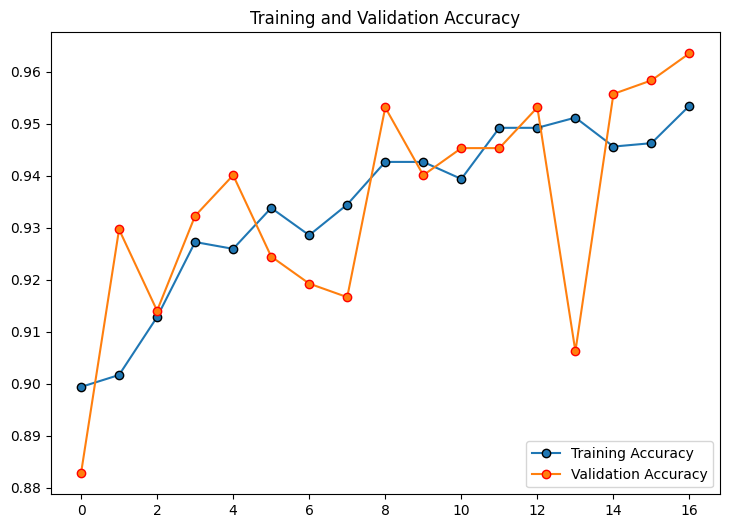

In [38]:
# Plotting training and validation accuracy


# Determine the number of epochs actually run
epochs_range = range(len(acc))

# Plot accuracy
plt.figure(figsize=(19,6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker = 'o',markeredgecolor = 'black')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker = 'o',markeredgecolor = 'red')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()




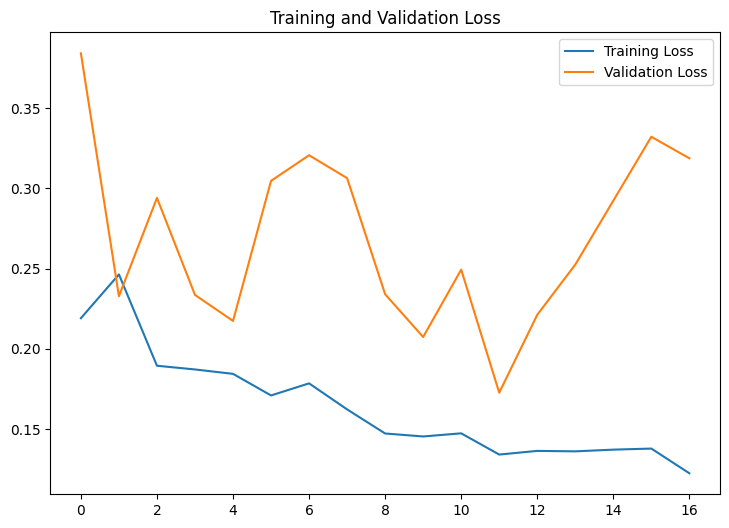

In [39]:
# Plot loss
plt.figure(figsize=(19,6))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
# i am going to predicattion on the dataset
for images_batch , labels_batch in test_Corn_dataset.take(1):
    print(images_batch[0].numpy())  # for display numpy array we write like this
    

[[[ 71.  97.  34.]
  [ 69.  95.  32.]
  [ 66.  92.  29.]
  ...
  [138. 125. 134.]
  [142. 126. 139.]
  [143. 125. 139.]]

 [[ 69.  95.  32.]
  [ 69.  95.  32.]
  [ 67.  93.  30.]
  ...
  [144. 131. 140.]
  [147. 131. 142.]
  [149. 131. 145.]]

 [[ 70.  96.  33.]
  [ 71.  97.  34.]
  [ 72.  96.  34.]
  ...
  [156. 143. 152.]
  [159. 143. 154.]
  [160. 142. 154.]]

 ...

 [[ 72. 100.  75.]
  [ 78. 107.  79.]
  [ 80. 109.  81.]
  ...
  [132. 125. 133.]
  [132. 125. 133.]
  [133. 126. 134.]]

 [[ 71. 101.  77.]
  [ 76. 106.  80.]
  [ 78. 108.  82.]
  ...
  [131. 124. 132.]
  [131. 124. 132.]
  [132. 125. 133.]]

 [[ 69. 101.  77.]
  [ 72. 104.  80.]
  [ 74. 104.  78.]
  ...
  [131. 124. 132.]
  [131. 124. 132.]
  [131. 124. 132.]]]


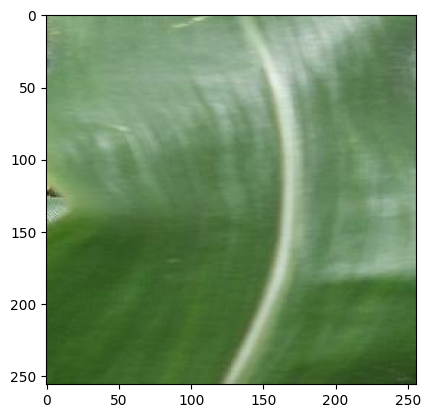

In [41]:
for images_batch , labels_batch in test_Corn_dataset.take(1):
        plt.imshow(images_batch[0].numpy().astype('uint8')) # for display images we write this code


first images to predict
First image's actual label :  Corn_(maize)___Common_rust_
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
Predict label :  Corn_(maize)___Common_rust_


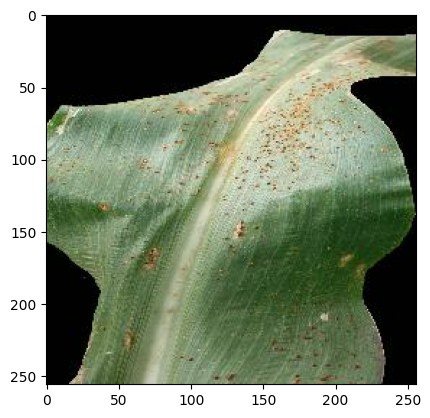

In [42]:
import numpy as np
for images_batch , labels_batch in test_Corn_dataset.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label =labels_batch[0].numpy() 
    
    print("first images to predict")
    plt.imshow(first_image)
    print("First image's actual label : ", class_names[first_label])

    # now what is my predict image model name here we can see the original value label and predict value label 
    # they are same or not
    batch_predication = model.predict(images_batch)
    print("Predict label : ",class_names[np.argmax(batch_predication[0])])


# note 5 
### now i am going to write the function  where take images and model as input and predict the class and confidnace/ accuracy

In [43]:
# Assuming you have a batch of images and labels from your dataset

for image_batch, label_batch in Corn_dataset.take(1):
    images = image_batch
    labels = label_batch.numpy()
    class_names = ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',]  # Replace with your actual class names

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


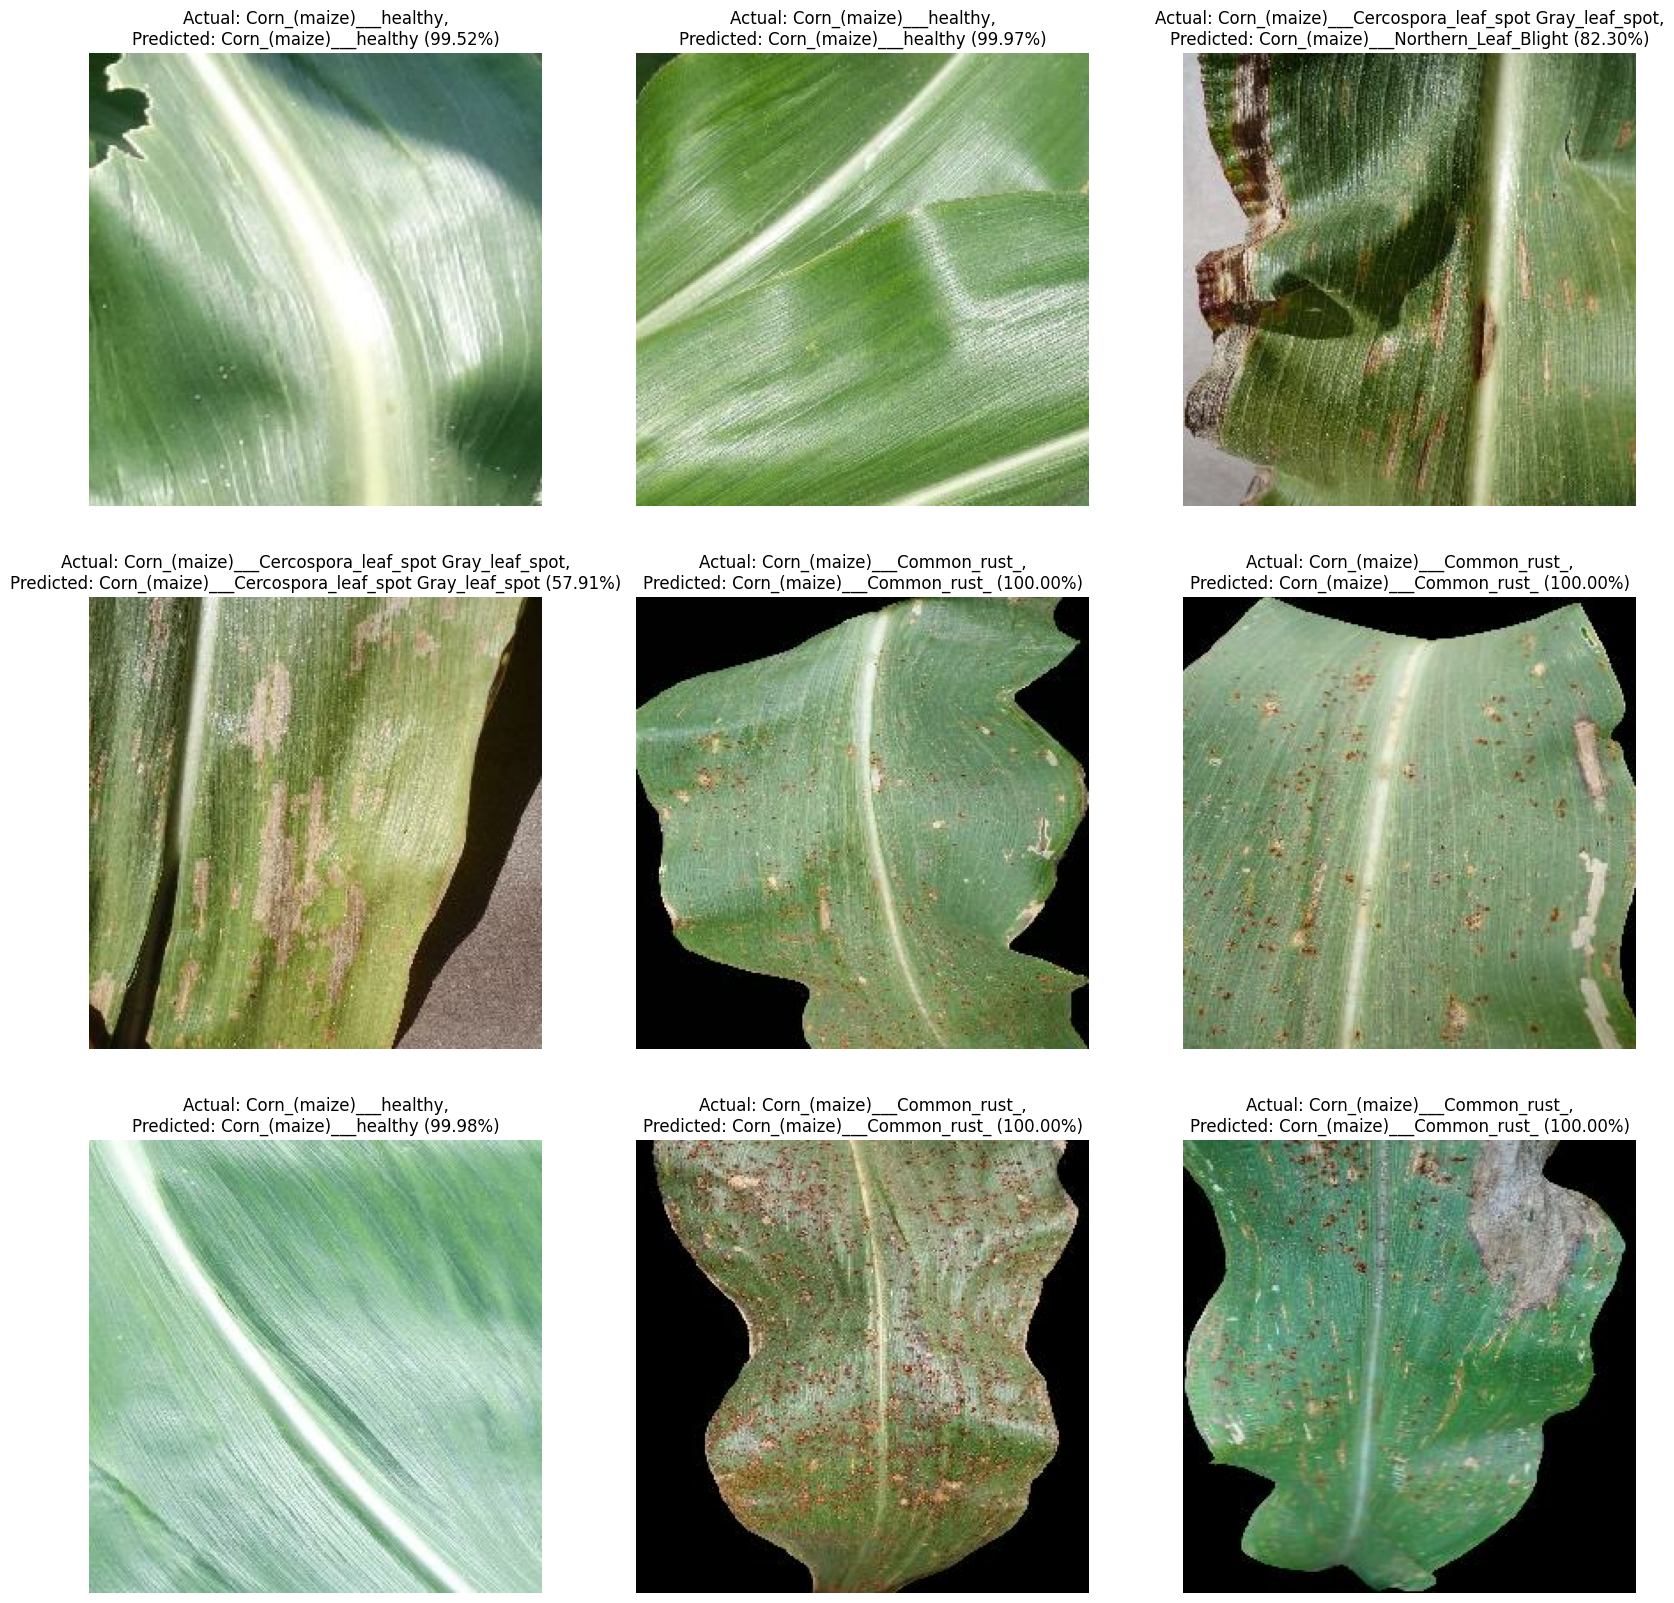

In [44]:
  # Correcting the module name to 'image' instead of 'images'
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img.numpy())
    img_array = tf.expand_dims(img_array, 0)  # Create a batch
    prediction = model.predict(img_array)
    
    predicted_class = np.argmax(prediction[0])
    confidence = round(100 * np.max(prediction[0]), 2)
    return predicted_class, confidence

# Assuming 'images' and 'labels' are your data and 'class_names' is the list of class names
plt.figure(figsize=(20, 20))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    
    predicted_class, confidence = predict(model, images[i])
    actual_class = class_names[labels[i]]
    
    plt.title(f"Actual: {actual_class},\nPredicted: {class_names[predicted_class]} ({confidence:.2f}%)")
    plt.axis("off")
plt.show()


In [46]:
import os

model_version = 1
save_dir = r"D:\A_WORK_DATA\Corn disease Project\models\1"
# Ensure the directory exists
os.makedirs(save_dir, exist_ok=True)
# Construct the full path to save the model, using a file name with an appropriate extension
model_path = os.path.join(save_dir, f"{model_version}.keras")

# Save the model in the native Keras format
try:
    model.save(model_path)
    print(f"Model saved to: {model_path}")
except ValueError as e:
    print(f"Error saving model: {e}")


Model saved to: D:\A_WORK_DATA\Corn disease Project\models\1\1.keras
